In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Load the fMNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Configuration 1
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model1.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Configuration 2
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(500, activation='relu'),
    Dense(10, activation='softmax')
])
model2.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Configuration 3
model3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model3.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate accuracy for each configuration
accuracy1 = model1.evaluate(test_images, test_labels)
accuracy2 = model2.evaluate(test_images, test_labels)
accuracy3 = model3.evaluate(test_images, test_labels)

print("Accuracy for Configuration 1:", accuracy1[1])
print("Accuracy for Configuration 2:", accuracy2[1])
print("Accuracy for Configuration 3:", accuracy3[1])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.8493 - accuracy: 0.6781 - val_loss: 0.8100 - val_accuracy: 0.6950
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7492 - accuracy: 0.7047 - val_loss: 0.7392 - val_accuracy: 0.7207
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6540 - accuracy: 0.7280 - val_loss: 0.6387 - val_accuracy: 0.7411
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6066 - accuracy: 0.7531 - val_loss: 0.6267 - val_accuracy: 0.7552
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5779 - accuracy: 0.7729 - val_loss: 0.6572 - val_accuracy: 0.7487
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5632 - accuracy: 0.7827 - val_loss: 0.5730 - val_accuracy: 0.7870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5423 - accuracy: 0.7916 - val_loss: 0.6111 - val_accuracy:

313/313 [==============================] - 1s 1ms/step
Accuracy for Configuration 1: 0.8342000246047974

Confusion Matrix for Configuration 1:
[[821   4  17  49   2   1 101   0   5   0]
 [  0 961   0  24   2   0  11   0   2   0]
 [ 15   3 697  11 155   0 118   0   1   0]
 [ 28  13   3 868  29   0  58   0   1   0]
 [  0   0  79  47 785   0  87   0   2   0]
 [  1   0   0   0   0 936   8  25   2  28]
 [179   2 115  38  93   0 568   0   5   0]
 [  0   0   0   0   0  24   8 930   0  38]
 [ 18   1   3   4   3   0  55   4 912   0]
 [  0   0   0   0   0  10   2  30   0 958]]

Examples of Incorrect Classification:
Actual Label: 4 Predicted Label: 6


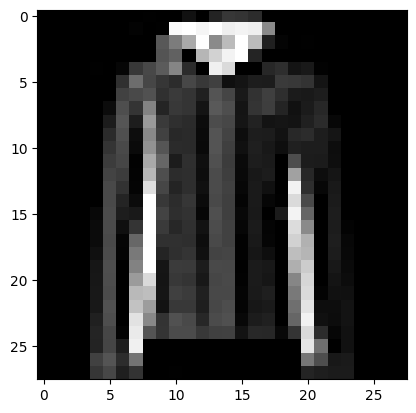

Actual Label: 7 Predicted Label: 5


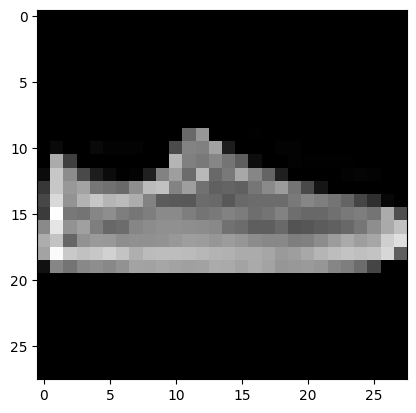

Actual Label: 5 Predicted Label: 6


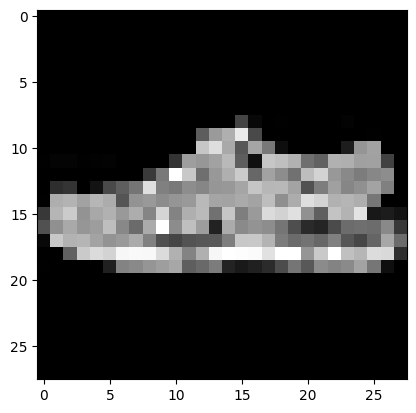

Actual Label: 9 Predicted Label: 5


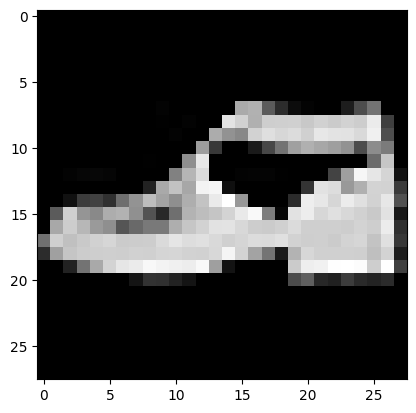

Actual Label: 4 Predicted Label: 2


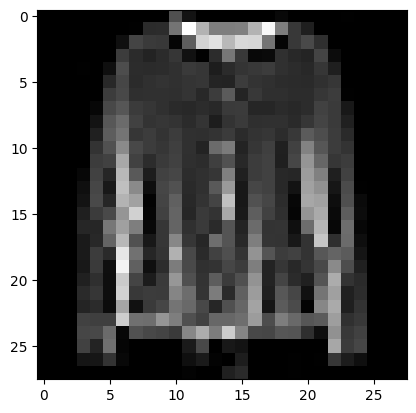

In [4]:

# Get predictions for Configuration 2
predictions = model2.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Find specific examples of incorrect classification
incorrect_indices = np.where(predicted_labels != test_labels)[0]
incorrect_images = test_images[incorrect_indices]
incorrect_actual_labels = test_labels[incorrect_indices]
incorrect_predicted_labels = predicted_labels[incorrect_indices]

# Report accuracy
print("Accuracy for Configuration 2:", accuracy2[1])
print("\nConfusion Matrix for Configuration 2:")
print(conf_matrix)
print("\nExamples of Incorrect Classification:")
for i in range(5):  # Print the first 5 examples
    print("Actual Label:", incorrect_actual_labels[i], "Predicted Label:", incorrect_predicted_labels[i])
    plt.imshow(incorrect_images[i], cmap='gray')
    plt.show()